In [11]:
import time
import pandas as pd
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf

In [12]:
image = cv.imread('car_photo.jpg')

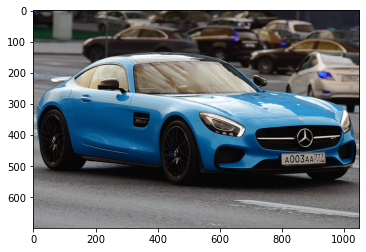

In [13]:
plt.imshow(image)

In [14]:
# activation of selective search
ss = cv.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [15]:
# set up
ss.setBaseImage(image)
ss.switchToSelectiveSearchFast()

In [17]:
# making bboxes
rects = ss.process()
print('Total Number of Region Proposals: {}'.format(len(rects)))

Total Number of Region Proposals: 6168


In [37]:
# we can visualize result of search
while True:
    # create a copy of original image to combinate it with bboxes
    imOut = image.copy()

    # set limit number of drawing
    numShowRects = 250
    increment = 50

    # itereate over all the region proposals
    for i, rect in enumerate(rects):
        # draw rectangle for region on the image
        if (i < numShowRects):
            x, y, w, h = rect
            cv.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv.LINE_AA)
        else:
             break

    # show output
    cv.imshow("Output", imOut)
    
    # record key press
    k = cv.waitKey(0) & 0xFF

    # q is pressed stop work
    if k == ord('q'):
        break
        
# close image show window
cv.destroyAllWindows()

In [90]:
# now lets save all our bboxes
for i in range(len(rects)):
    x, y, w, h = rects[i]
    crop_img = image[y:y+h, x:x+w]
    cv.imwrite(os.path.join(r"C:\Users\Rome's Papa\Car_Number\rects", f'{i}.jpg'), crop_img)